In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 3.7 Exercises
### Conceptual
1. H0 : each TV, radio, newspaper advaertising with other media exist, are not effective as to sales. 
 Since p-vals of TV and radio are smaller than 0.5, H0s for TV and radio are rejected, their advertisings are effective in sales.

2. KNN 회귀는 결과가 정량적 변수이며, 분류는 결과가 정성적 변수이다
3. $ Salary = 50 + 20 * GPA + 0.07 * IQ + 35 * Level + 0.01 * GPA*IQ - 10 * GPA * Level$
(a)
   1) 거짓. level과 salary는 정비례
   2) 참. level과 salary는 정비례

(b) $ Salary = 50 + 20 * 4  + 0.07 * 110 + 35 * LEvel + 0.01 * 110 * 4 - 10 * 4 * Level = 142.1 - 5 * Level = 137.1$

(c) 해당 변수의 유의미함은 계수의 크기로 결정되는 것이 아니다. 해당 모델 p-value 유의확률 검정을 통해 검증이 필요하다.


4. (a) 제곱 항이 모델에 추가되면서 모델의 복잡도가 올라간다. 해당 모델의 Variance가 증가함에 따라 훈련데이터에 대한 RSS는 감소할 것이므로, 단항 회귀 보다 낮은 RSS를 보일 것이다.

(b) 테스트 데이터에 대해서는 원래 단항 회귀에 대한 RSS가 더 낮을 것이다. Variance가 높은 모델은 훈련 데이터에 과적합 될 가능성이 높으며, 이에 따라 원래 회귀 모델인 단항 회귀에 검정 데이터가 더 맞게 회귀가 될 것이다

8. 

In [2]:
auto_df = pd.read_csv('../data/auto.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
reg8 = sm.OLS.from_formula('mpg ~ horsepower', data=auto_df).fit()
print(reg8.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           7.03e-81
Time:                        12:27:58   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

8-1) f통계량이 1보다 훨씬 크고, f-통계량의 유의확률이 거의 0에 가까움

2) r^2가 0.606이다. 해당 모델은 데이터의 분산의 60.6정도 설명력이 있다
   
3) horsepower의 계수가 -인 것으로 보아 두 변수는 반비례 관계
   
4) $39.9359 - 98*0.1578 = 24.4715 $    

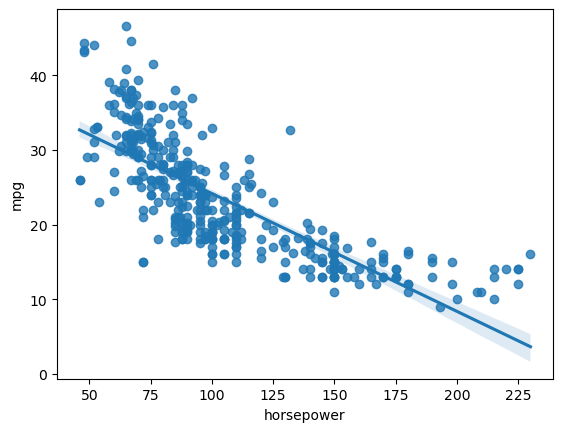

In [6]:
# 8-b
sns.regplot(x='horsepower', y='mpg', data=auto_df)
plt.show()

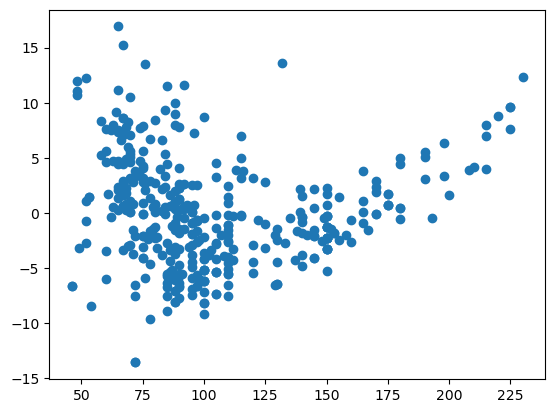

In [9]:
pred = reg8.predict(auto_df['horsepower'])
resid = auto_df['mpg'] - pred
plt.scatter(x=auto_df['horsepower'],y=resid)

# U-shape = non-linearity

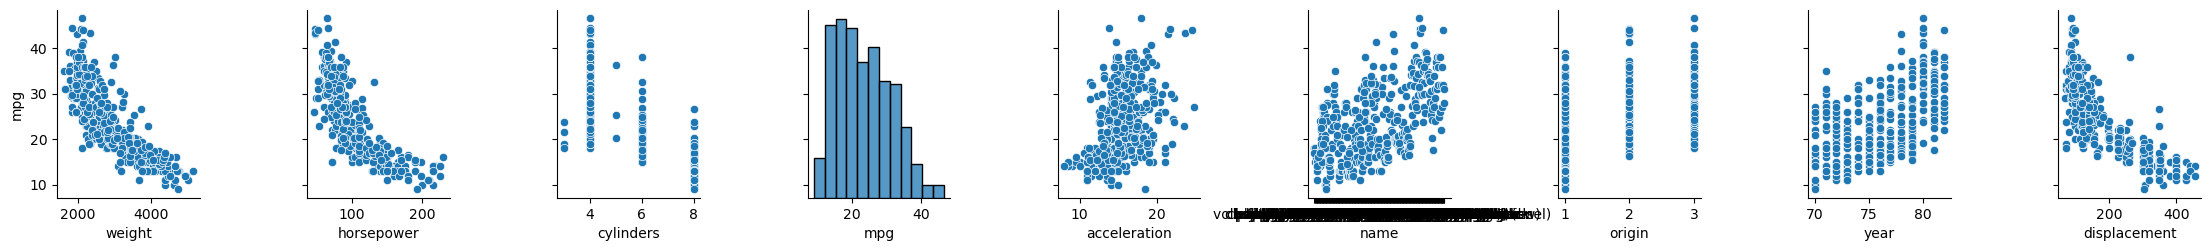

In [10]:
# 9 (a)
predictors = set(auto_df.columns) - set('mpg')
sns.pairplot(auto_df, x_vars = predictors , y_vars = 'mpg')
plt.show()

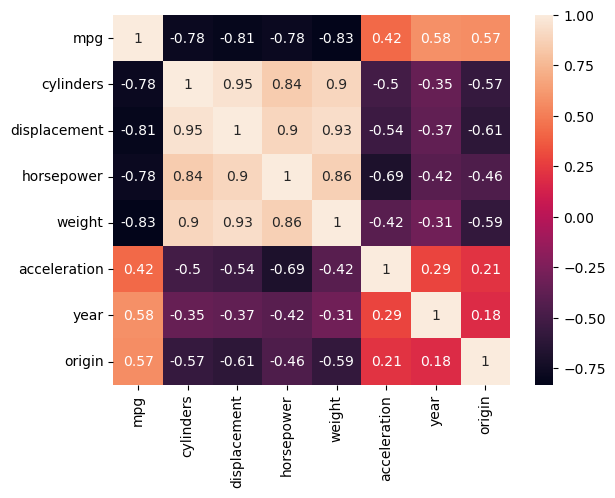

In [12]:
# (b)
auto_corr = auto_df.corr()
sns.heatmap(auto_corr, annot=True)
plt.show()

In [13]:
# (c)
reg9 = sm.OLS.from_formula('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=auto_df).fit()
print(reg9.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.04e-139
Time:                        12:50:25   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

1) f통계량이 1보다 월등히 높고, 해당 유의확률이 거의 0이므로 종속변수와 독립변수들로 만들어진 모델읜 유의하도 결론 낼 수 있다
2) 유의확률이 0.05보다 작은 displacement, weight, year, origin이 유의한 변수라고 볼 수 있다
3) year변수의 유의확률이 매우 작아 의미가 있다고 볼 수 있고, 해당 변수의 계수가 0.7508인 것으로 보아 연식이 길어질 수록 연비 효율성이 올라간다.

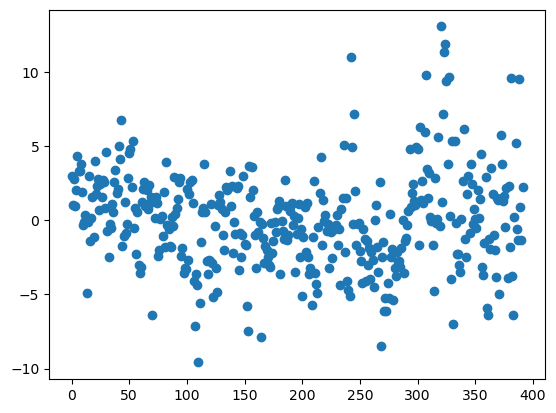

In [16]:
# residual plot
pred = reg9.predict(auto_df[predictors])
resid = auto_df['mpg'] - pred
plt.scatter(x=range(0,len(resid), 1), y=resid)

[]

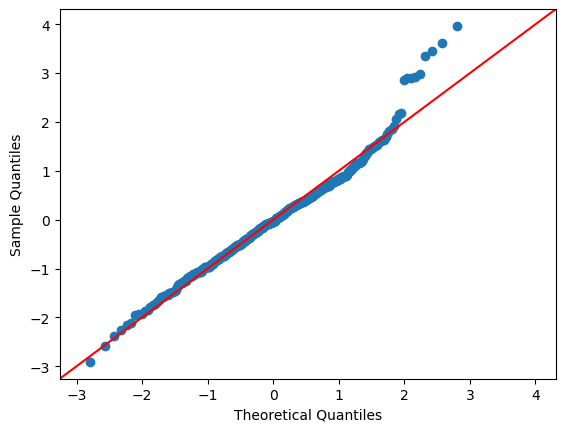

In [20]:
# qqplot : residuals are normal according to qqplot

sm.qqplot(resid, fit=True, line='45')
plt.plot()


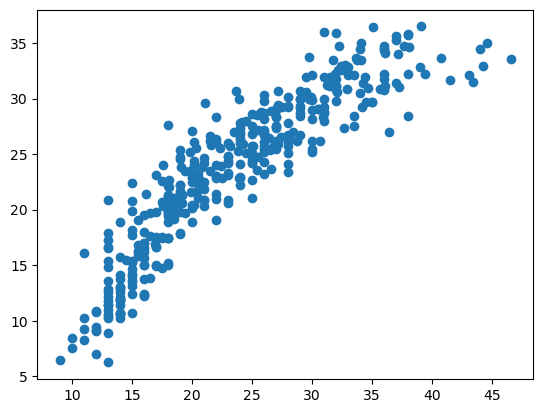

In [22]:
# outlier check
plt.scatter(x=auto_df['mpg'], y=pred)
plt.show()

In [26]:
# f)
reg9f = sm.OLS.from_formula('mpg ~ np.log(weight) + np.sqrt(horsepower) + acceleration + pow(acceleration,2)', data=auto_df).fit()
reg9f.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.26e-112
Time:                        13:14:36   Log-Likelihood:                -1096.1
No. Observations:                 392   AIC:                             2202.
Df Residuals:                     387   BIC:                             2222.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              178.3030     10.805     16.503      0.000     157.060     199.546
np.log(weight)         -14.7426      1.740     -8.473      0.000     -18.163     -11.322
np.sqrt(horsepower)     -1.8519      0.360     -5.144      0.000      -2.560      -1.144
acceleration            -2.1989      0.639     -3.441      0.001      -3.455      -0.942
pow(acceleration, 2)     0.0614      0.019      3.305      0.001       0.025       0.098
==============================================================================
Omnibus:                       25.815   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.791
Skew:                           0.494   Prob(JB):                     1.03e-08
Kurtosis:                       4.129   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
auto_df[['weight', 'horsepower', 'acceleration']]


,weight,horsepower,acceleration
0,3504,130,12.0
1,3693,165,11.5
2,3436,150,11.0
3,3433,150,12.0
4,3449,140,10.5
...,...,...,...
387,2790,86,15.6
388,2130,52,24.6
389,2295,84,11.6
390,2625,79,18.6


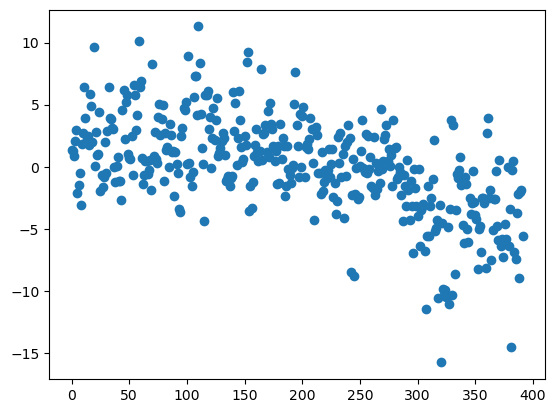

In [32]:
pred_9f = reg9f.predict(auto_df[['weight', 'horsepower', 'acceleration']])
resid_9f = pred_9f - auto_df['mpg']
plt.scatter(x=range(0,len(resid),1), y=resid)

# 감지 가능한 패턴이 덜 보인다

[]

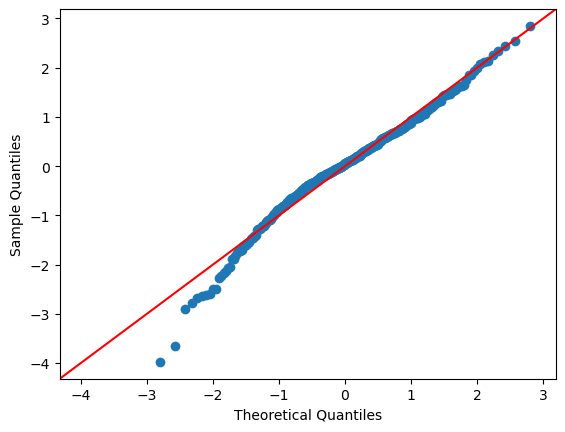

In [33]:

sm.qqplot(resid_9f, fit=True, line='45')
plt.plot()

In [63]:
## 11
np.random.seed(1)
x = np.random.normal(0,1,100)
y = 2 * x + np.random.normal(0,1,100)
df = pd.DataFrame(np.stack([x,y],1))

df.shape

(100, 2)

In [64]:
# (a)
reg11a = sm.OLS.from_formula('y ~ x + 0', data=df).fit()
reg11a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    3.46e-36
Time:                        19:22:57   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# (b)
reg11b = sm.OLS.from_formula('x ~ y + 0', data=df).fit()
reg11b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    3.46e-36
Time:                        19:24:40   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

11-(C) Both results reflect the same regression line

11-(d)

$$
\begin{array}{cc}
t = \beta / SE(\beta) &
\beta = \frac {\sum{x_i y_i}} {\sum{x_i^2}} &
SE(\beta) = \sqrt{\frac {\sum{(y_i - x_i \beta)^2}} {(n-1) \sum{x_i^2}}}
\end{array}
\\
t = {\frac {\sum{x_i y_i}} {\sum{x_i^2}}}
    {\sqrt{\frac {(n-1) \sum{x_i^2}} {\sum{(y_i - x_i \beta)^2}}}}
\\
\frac {\sqrt{n-1} \sum{x_i y_i}}
      {\sqrt{\sum{x_i^2} \sum{(y_i - x_i \beta)^2}}}
\\
\frac {\sqrt{n-1} \sum{x_i y_i}}
      {\sqrt{\sum{x_i^2} \sum{(y_i^2 - 2 \beta x_i y_i  + x_i^2 \beta^2)}}}
\\
\frac {\sqrt{n-1} \sum{x_i y_i}}
      {\sqrt{\sum{x_i^2} \sum{y_i^2} - 
            \sum{x_i^2} \beta (2 \sum{x_i y_i} - \beta \sum{x_i^2})}}
\\
\frac {\sqrt{n-1} \sum{x_i y_i}}
      {\sqrt{\sum{x_i^2} \sum{y_i^2} - 
            \sum{x_i y_i} (2 \sum{x_i y_i} - \sum{x_i y_i})}}
\\
t = \frac {\sqrt{n-1} \sum{x_i y_i}} 
          {\sqrt{\sum{x_i^2} \sum{y_i^2} - (\sum{x_i y_i})^2 }}
$$
